In [1]:
import cv2
import numpy as np

import matplotlib.pyplot as plt

In [2]:
## 测地膨胀
def D(n,F,B,G):
    if(n==0):
        return F
    if(n==1):
        return cv2.bitwise_and(cv2.dilate(F,B),G)#cv2.bitwise_and
    return D(1,D(n-1,F,B,G),B,G)

In [3]:
## 测地腐蚀
def E(n,F,B,G):
    if(n==0):
        return F
    if(n==1):
        return cv2.bitwise_or(cv2.erode(F,B),G)
    return E(1,E(n-1,F,B,G),B,G)

In [4]:
## 膨胀重建
def RD(input_img,kernel,template):
    prevD = D(1,input_img,kernel,template)
    i=2
    while(1):
        currD = D(i,input_img,kernel,template)
        if((prevD==currD).all()):
            return currD
        else:
            prevD = currD
            i=i+1


In [5]:
## 腐蚀重建
def RE(input_img,kernel,template):
    prevE = E(1,input_img,kernel,template)
    i=2
    while(1):
        currE = E(i,input_img,kernel,template)
        if((prevE==currE).all()):
            return currE
        else:
            prevE = currE
            i=i+1

In [6]:
img = cv2.imread("Fig0929(a).tif")
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
_,img_bin = cv2.threshold(img_gray,127,255,cv2.THRESH_BINARY)

In [7]:
kernel_erode = cv2.getStructuringElement(cv2.MORPH_RECT,(1,51))
kernel_rec = cv2.getStructuringElement(cv2.MORPH_RECT,(3,3))

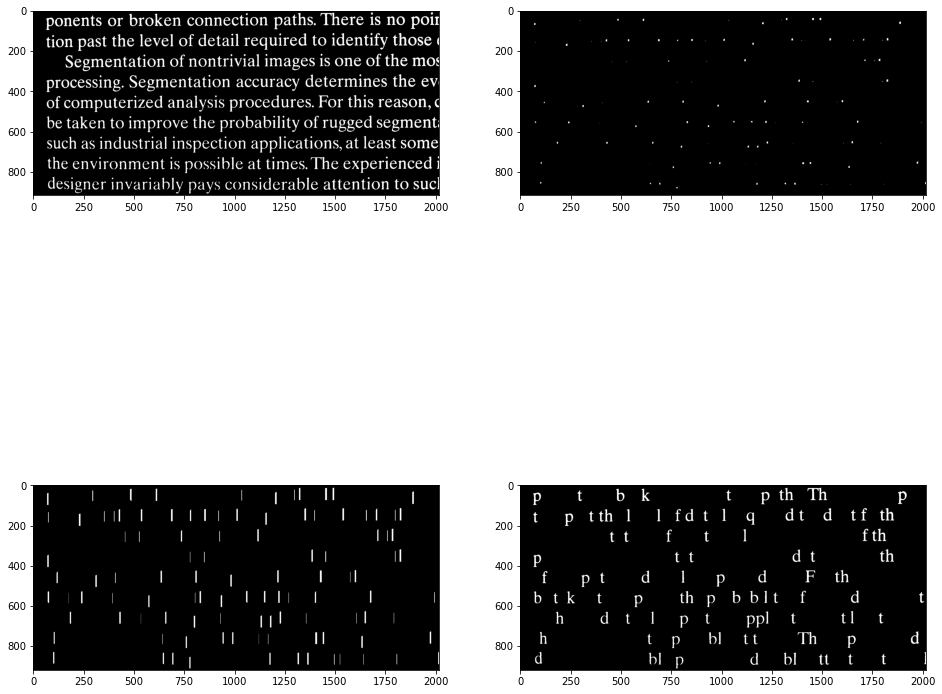

In [8]:
## 重建开操作
img_erode = cv2.erode(img_bin,kernel_erode)
img_open = cv2.morphologyEx(img_bin,cv2.MORPH_OPEN,kernel_erode)

img_rec = RD(img_erode,kernel_rec,img_bin)

plt.figure(figsize=(16,16))
plt.subplot(221)
plt.imshow(img_bin,cmap='gray')
plt.subplot(222)
plt.imshow(img_erode,cmap='gray')
plt.subplot(223)
plt.imshow(img_open,cmap='gray')
plt.subplot(224)
plt.imshow(img_rec,cmap='gray')